# Generating Fits with random parameters

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits

In [10]:
# Initial parameters
I0_init = 2.0
gamma_init = 1.2
r_g_init = 1
sigma_init = 0.2
f_init = 0.6

# Numbers of profiles to generate
num_profiles = 5

### Synthetic Profile

In [11]:
# Model definition
r = np.linspace(0.1, 3, 300)


# The model function
def model(r, I0, gamma, r_g, sigma, f):
    c = 0.3
    R_cutL = 0.1  # Fixed
    R_cutR = 3.0  # Fixed

    r_sinc = c * (np.pi * ((r - r_g) / sigma))**2

    powerlaw = I0 * ((r / r_g)**(-gamma))
    sinc = np.sin(r_sinc) / r_sinc
    gauss = np.exp((-(r - r_g)**4) / (2 * sigma**4))
    L_cut_factor = (r >= R_cutL).astype(float)
    R_cut_factor = (r <= R_cutR).astype(float)
    # NO_SINC_MODEL
    gap_factor = (1 - f * (gauss))

    return powerlaw * gap_factor * L_cut_factor * R_cut_factor


# Image generation from the profile
def generate_image_from_profile(radius, intensity, image_size=256):
    """
    Generates a 2D image from a 1D radial intensity profile.

    Parameters:
    radius (array-like): 1D array of radius values.
    intensity (array-like): 1D array of intensity values corresponding to the radius.
    image_size (int): Size of the output image (image_size x image_size).

    Returns:
    np.ndarray: 2D array representing the generated image.
    """
    # Ensure radius and intensity are numpy arrays
    radius = np.asarray(radius)
    intensity = np.asarray(intensity)

    # Check if radius and intensity have the same length
    if radius.shape != intensity.shape:
        raise ValueError("Radius and intensity must have the same shape.")

    y, x = np.indices((image_size, image_size))
    center = (image_size - 1) / 2
    r_img = np.sqrt((x - center)**2 + (y - center)**2)

    # Rescale so that max pixel radius = max profile radius
    r_img = r_img / r_img.max() * radius.max()

    # Interpolate profile onto the pixel grid
    image = np.interp(r_img, radius, intensity, left=0, right=0)
    return image

Profile 1: I0=1.18, gamma=1.48, r_g=1.19, sigma=0.18, f=0.72


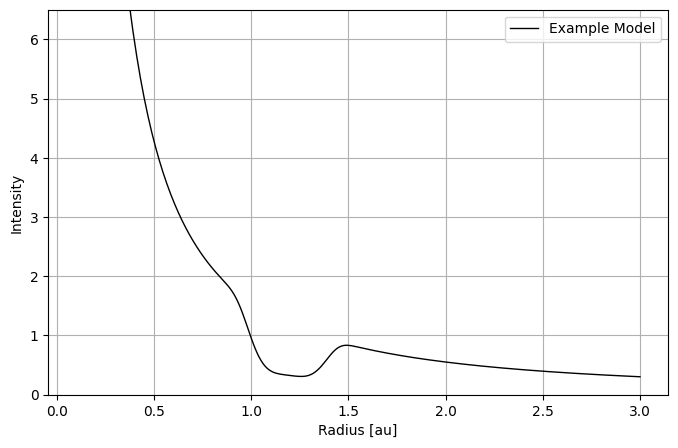

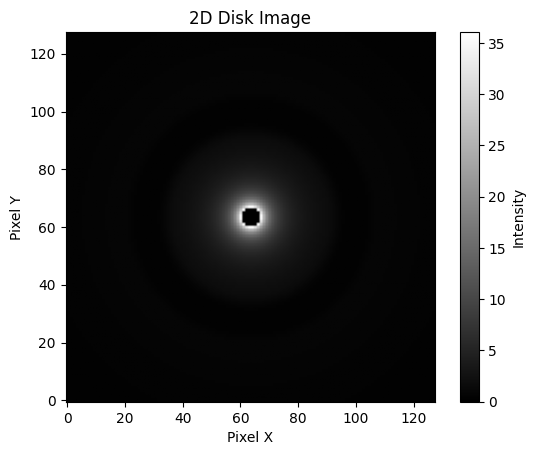

Profile 2: I0=1.68, gamma=1.31, r_g=1.15, sigma=0.02, f=0.79


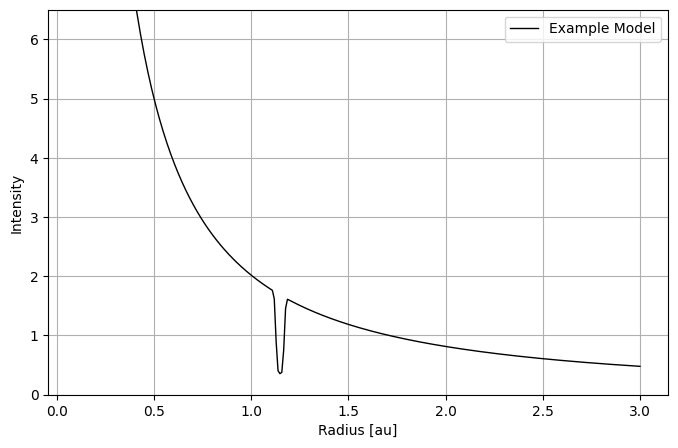

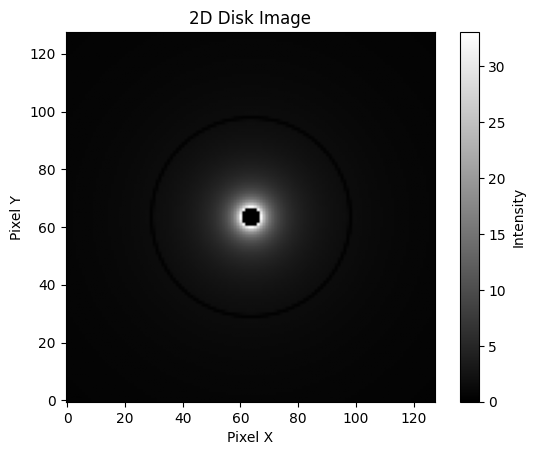

Profile 3: I0=2.30, gamma=0.83, r_g=0.96, sigma=0.21, f=0.89


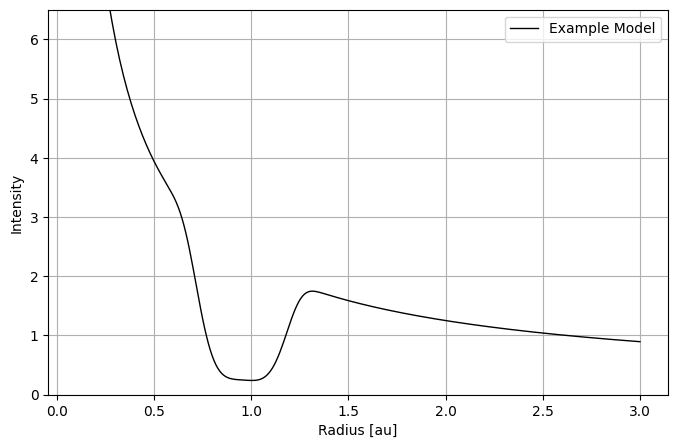

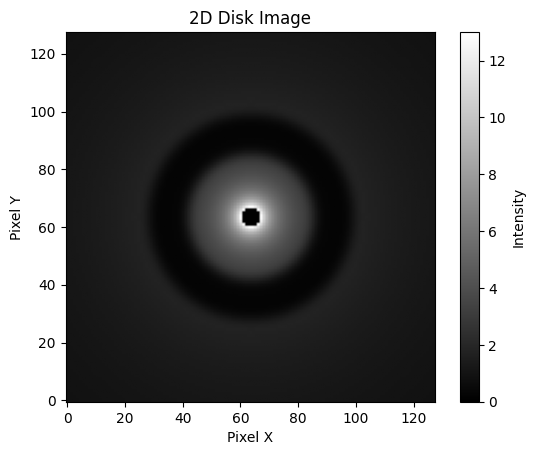

Profile 4: I0=2.56, gamma=1.19, r_g=1.09, sigma=0.23, f=0.66


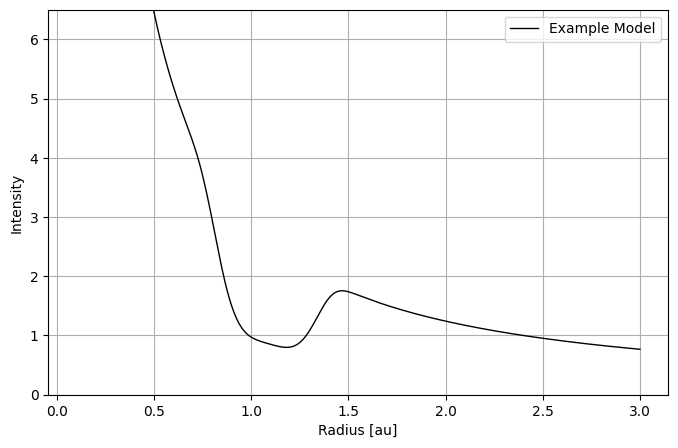

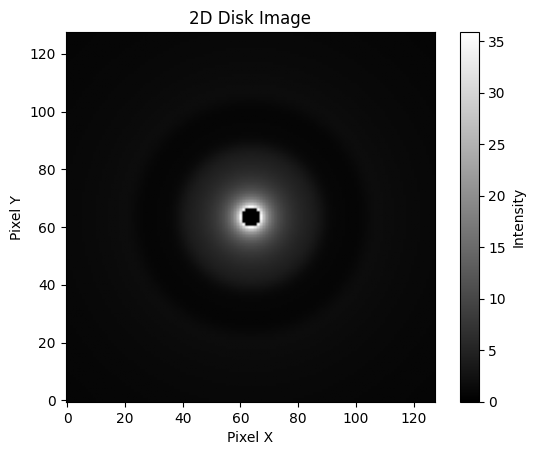

Profile 5: I0=2.16, gamma=0.76, r_g=0.83, sigma=0.35, f=0.80


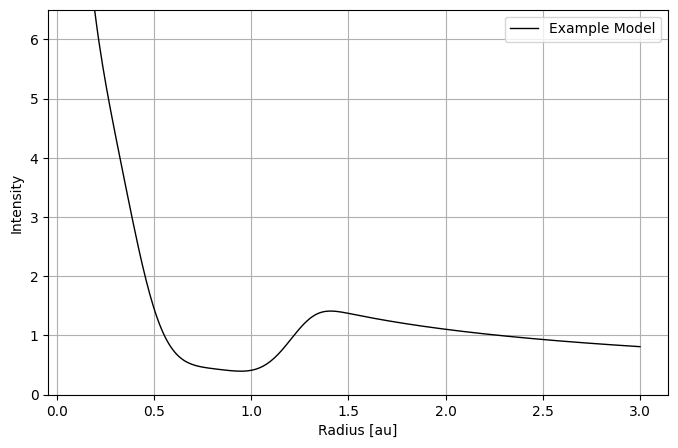

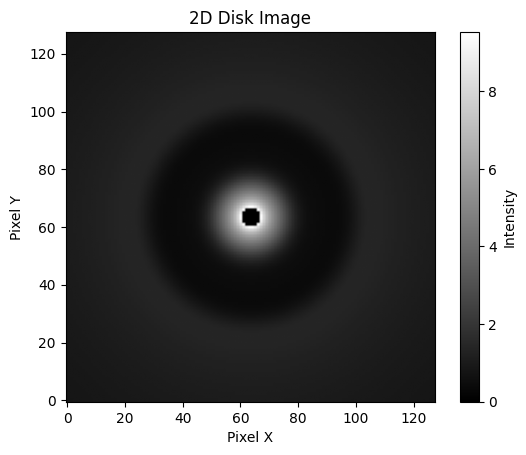

In [12]:
for i in range(1, num_profiles + 1):

    # Generate random parameters from initial parameters
    I0 = np.random.normal(I0_init, 0.5)
    gamma = np.random.normal(gamma_init, 0.3)
    r_g = np.random.normal(r_g_init, 0.3)
    sigma = np.random.normal(sigma_init, 0.1)
    f = np.random.normal(f_init, 0.2)

    print(f"Profile {i}: I0={I0:.2f}, gamma={gamma:.2f}, r_g={r_g:.2f}, sigma={sigma:.2f}, f={f:.2f}")

    # Profile generation
    profile = model(r, I0, gamma, r_g, sigma, f)

    # Graph
    plt.figure(figsize=(8, 5))
    plt.plot(r, profile, label="Example Model", color="black", linestyle="-", linewidth=1)
    plt.xlabel("Radius [au]")
    plt.ylabel("Intensity")
    plt.ylim(0, 1 * np.max(model(r, 1.0, 1.0, 0.65, 0.1, 0.5)))
    plt.legend()
    plt.grid(True)
    plt.show()

    # Create 2D
    image = generate_image_from_profile(r, profile, image_size=128)
    plt.imshow(image, origin='lower', cmap='grey')
    plt.colorbar(label='Intensity')
    plt.title('2D Disk Image')
    plt.xlabel('Pixel X')
    plt.ylabel('Pixel Y')
    plt.show()

    # Save as a FITS file
    hdu = fits.PrimaryHDU(image)
    hdu.writeto(f'Generated_Fits/Generated_Fits_Random/synthetic_disk_{i}.fits', overwrite=True)